figure 1.1 Original Stock Price of A


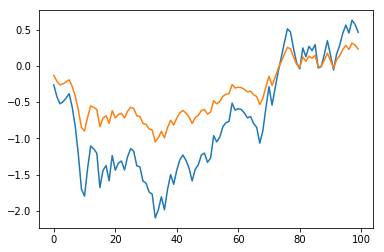

MSE Train:  0.139401
MSE Test:  0.898337
MSE Train:  0.00735659
MSE Test:  0.0140391
MSE Train:  0.00320676
MSE Test:  0.0143551
MSE Train:  0.010852
MSE Test:  0.0942079
MSE Train:  0.00385445
MSE Test:  0.0153592
MSE Train:  0.00362644
MSE Test:  0.00898181
MSE Train:  0.00427459
MSE Test:  0.00659842
MSE Train:  0.00644173
MSE Test:  0.0805365
MSE Train:  0.00651855
MSE Test:  0.013003
MSE Train:  0.00518415
MSE Test:  0.0204006
MSE Train:  0.00438303
MSE Test:  0.0213042
MSE Train:  0.00464765
MSE Test:  0.0407071
MSE Train:  0.00304561
MSE Test:  0.0183801
MSE Train:  0.00364032
MSE Test:  0.0225251
MSE Train:  0.00555142
MSE Test:  0.0534583
MSE Train:  0.0040913
MSE Test:  0.022873
MSE Train:  0.00662012
MSE Test:  0.00934698
MSE Train:  0.0035521
MSE Test:  0.00775131
MSE Train:  0.00362696
MSE Test:  0.0110497
MSE Train:  0.00487415
MSE Test:  0.0409298
MSE Train:  0.00452204
MSE Test:  0.0200869
MSE Train:  0.00416919
MSE Test:  0.0326984
MSE Train:  0.00422404
MSE Test:  0.0

MSE Train:  0.00321119
MSE Test:  0.0172943
MSE Train:  0.00341555
MSE Test:  0.0327984
MSE Train:  0.00404243
MSE Test:  0.0239466
MSE Train:  0.00320614
MSE Test:  0.0134915
MSE Train:  0.00321943
MSE Test:  0.0086926
MSE Train:  0.00306055
MSE Test:  0.0151535
MSE Train:  0.0032144
MSE Test:  0.0213834
MSE Train:  0.00333973
MSE Test:  0.00742536
MSE Train:  0.00342494
MSE Test:  0.0158071
MSE Train:  0.00325441
MSE Test:  0.0212226
MSE Train:  0.00336402
MSE Test:  0.0280841
MSE Train:  0.00394221
MSE Test:  0.0318537
MSE Train:  0.00307554
MSE Test:  0.0177136
MSE Train:  0.00350484
MSE Test:  0.0223842
MSE Train:  0.00324306
MSE Test:  0.0113651


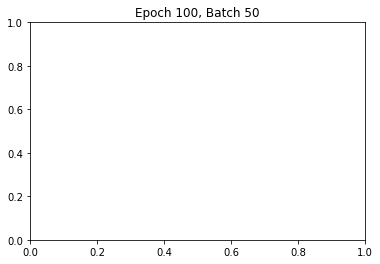

In [284]:
#Courtesy of Sebastian Heinz and his article from medium.com

# Import
# Necessary libraries including dataframe handling libraries like pandas
# And neural network-building like tensorflow are imported
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('/Users/BrianLee/Desktop/StockPrice/A.csv')
# This data is derived from Yahoo's stock price data API.

# Drop date variable
# Recurrent Neural Network, or RNN is to be used in this example
# And thus date and other features except adjusted close are all dropped
data = data.drop(['Date', 'Open', 'High', 'Low', 'Volume'], 1)

# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# Make data a np.array
data = data.values

# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# Build X(input feature) and y(output class) for training and testing
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

# Number of stocks in training data
n_stocks = X_train.shape[1]

# Neurons per hidden layer
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholder
# Defined to be used along with tensorflow
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg",distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
#line2, = ax1.plot(y_test * 0.5)
plt.show()
print('figure 1.1 Original Stock Price of A')

# Fit neural net
batch_size = 5
mse_train = []
mse_test = []

# Run
epochs = 101
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)